# Daily Active Users - RigUp

In [140]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
SMALL_SIZE = 8
plt.rc('font', size=SMALL_SIZE)        
plt.rc('axes', titlesize=SMALL_SIZE)   
plt.rc('axes', labelsize=SMALL_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)   
%matplotlib inline

In [141]:
# Reading in the csv I created from the Postgresql Database

Data = pd.read_csv('../RigUp Project/RUData.csv', sep = ',')

Data.head()

,id,metric,value,day
0,1,daily-active-users,1423,3/1/2018
1,2,daily-active-users,1420,3/2/2018
2,3,daily-active-users,453,3/3/2018
3,4,daily-active-users,543,3/4/2018
4,5,daily-active-users,1398,3/5/2018


In [142]:
#converting the 'day' field into datetime

Data['day'] = pd.to_datetime(Data['day'])

Data.head()

,id,metric,value,day
0,1,daily-active-users,1423,2018-03-01
1,2,daily-active-users,1420,2018-03-02
2,3,daily-active-users,453,2018-03-03
3,4,daily-active-users,543,2018-03-04
4,5,daily-active-users,1398,2018-03-05


In [143]:
# Adding weekday to each day

Data['Weekday'] = Data['day'].dt.weekday_name

Data.head()

,id,metric,value,day,Weekday
0,1,daily-active-users,1423,2018-03-01,Thursday
1,2,daily-active-users,1420,2018-03-02,Friday
2,3,daily-active-users,453,2018-03-03,Saturday
3,4,daily-active-users,543,2018-03-04,Sunday
4,5,daily-active-users,1398,2018-03-05,Monday


In [144]:
# normalizing the data so the weeks sttart on Sunday and adding a field for Week Number.  

Data['Week'] = Data['day'].apply(lambda x: (x + dt.timedelta(days=1)).week)

Data.head()

,id,metric,value,day,Weekday,Week
0,1,daily-active-users,1423,2018-03-01,Thursday,9
1,2,daily-active-users,1420,2018-03-02,Friday,9
2,3,daily-active-users,453,2018-03-03,Saturday,9
3,4,daily-active-users,543,2018-03-04,Sunday,10
4,5,daily-active-users,1398,2018-03-05,Monday,10


In [145]:
# Lastly, getting rid of 'daily-active-sessions' as this is not used in the analysis

Data_Final = Data[Data.metric=='daily-active-users']
Data_Final.head()

,id,metric,value,day,Weekday,Week
0,1,daily-active-users,1423,2018-03-01,Thursday,9
1,2,daily-active-users,1420,2018-03-02,Friday,9
2,3,daily-active-users,453,2018-03-03,Saturday,9
3,4,daily-active-users,543,2018-03-04,Sunday,10
4,5,daily-active-users,1398,2018-03-05,Monday,10


In [146]:
# creating an aggregated dataframe to add percent change and group by week

Agg_Data = pd.DataFrame(Data_Final.groupby(['Week'],as_index=False)['value'].mean())

Agg_Data.head()

,Week,value
0,9,1098.666667
1,10,1156.428571
2,11,1196.285714
3,12,1071.428571
4,13,1095.428571


In [147]:
Agg_Data['Delta_PC'] = (Agg_Data['value'] / Agg_Data['value'].shift(1) - 1).fillna(0)

In [148]:
Agg_Data

,Week,value,Delta_PC
0,9,1098.666667,0.000000
1,10,1156.428571,0.052575
2,11,1196.285714,0.034466
3,12,1071.428571,-0.104371
4,13,1095.428571,0.022400


### Now that I have the data set up from the previous 4 exercises, I am going to visualize it (as well as look at it by weekday because it seems relevant)

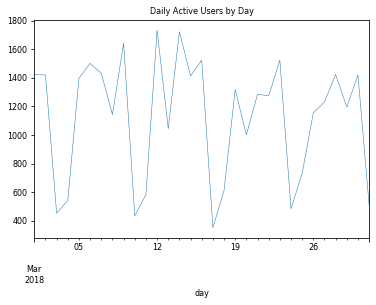

In [150]:
# First I am just going to check out what it looks like by day.  We dont see anything very interesting here. Lots of volatility

Data_Final.set_index('day', inplace=True)


Data_Final['value'].plot(linewidth=0.5);
plt.title('Daily Active Users by Day');

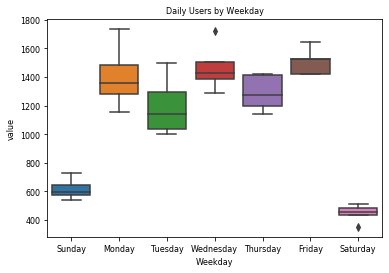

In [151]:
# Now to dive a little deeper, I wanted to check it out by day.  People often don't like boxplots but in this case it is useful 
# because you can see how the outliers effect each day.  

sns.boxplot(data=Data_Final,order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], x='Weekday', y='value').set_title("Daily Users by Weekday");

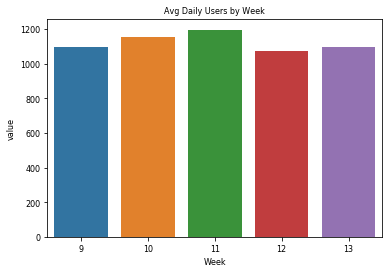

In [156]:
sns.barplot(x="Week", y="value", data=Agg_Data);
plt.title('Avg Daily Users by Week');